In [84]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
# reading our dataset
Main_data=pd.read_csv("merged_data.csv")
Main_data.head()

del Main_data["Unnamed: 0"]
Main_data.head()

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Regionname,Propertycount,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
0,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
1,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
2,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
3,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
4,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9


In [48]:
# sort the dataset based on price from highest to lowest
high_to_low_price=Main_data.sort_values("Price" , ascending=False)
high_to_low_price.index.name = None
high_to_low_price.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Regionname,Propertycount,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
8650,Mulgrave,35 Bevis St,3,h,9000000,PI,Hall,29/07/2017,18.8,3170,...,South-Eastern Metropolitan,7113,40,2167,746,430,2134,0.8,1913,2.8
1782,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,13/05/2017,9.0,3126,...,Southern Metropolitan,3265,46,3500,1101,515,3591,0.8,2875,2.7
3619,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,17/06/2017,5.3,3122,...,Southern Metropolitan,11308,34,2259,1207,400,3279,0.9,2145,2.1
4001,Kew,15 Barry St,6,h,6500000,S,Jellis,13/08/2016,5.6,3101,...,Southern Metropolitan,10331,41,3000,1120,476,3301,0.8,2497,2.5
193,Middle Park,136 Page St,5,h,6400000,S,Marshall,9/09/2017,3.0,3206,...,Southern Metropolitan,2019,46,3467,1372,600,3853,0.9,2659,2.3


In [4]:
#Number of suburbs
Main_data["Suburb"].nunique()

315

Things to consider:
•	Only consider properties between 800k to 1 million dollars.
•	Only consider free standing homes, i.e., no apartments or townhouses.
•	Compare top 5 suburbs in the northern, eastern, western, and southern regions of Melbourne in terms of:
Sale price
Distance to cbd
Distance to major shopping centres
Distance to public transport
Proximity to schools 
•	Correlation between lifestyle choice and which location people choose to live, i.e., singles and young couple’s vs families
•	Correlation between disposable income and people’s willingness to take on debt.


In [5]:
#Only consider properties between 800k to 1 million dollars.
mid_price=Main_data.loc[(Main_data["Price"] >= 800000) & (Main_data["Price"] <= 1000000)]
mid_price.head()

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Regionname,Propertycount,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
11,Abbotsford,42 Valiant St,2,h,890000,S,Biggin,17/09/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
24,Abbotsford,132 Vere St,3,h,1000000,SP,Biggin,8/04/2017,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
25,Abbotsford,6/205 Gipps St,2,u,870000,S,Biggin,20/05/2017,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
31,Abbotsford,2 Federation La,3,h,855000,S,Nelson,24/06/2017,3.0,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
37,Abbotsford,16 Federation La,3,h,955000,S,Biggin,17/02/2018,3.0,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9


In [6]:
mid_price["Suburb"].nunique()

230

In [7]:
#Only consider free standing homes, i.e., no apartments or townhouses.
mid_price_h=mid_price.loc[mid_price["Type"] == "h"]
mid_price_h.head()

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Regionname,Propertycount,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
11,Abbotsford,42 Valiant St,2,h,890000,S,Biggin,17/09/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
24,Abbotsford,132 Vere St,3,h,1000000,SP,Biggin,8/04/2017,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
31,Abbotsford,2 Federation La,3,h,855000,S,Nelson,24/06/2017,3.0,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
37,Abbotsford,16 Federation La,3,h,955000,S,Biggin,17/02/2018,3.0,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
50,Airport West,3 Deidre Ct,3,h,895000,PI,Rendina,10/09/2016,13.5,3042,...,Western Metropolitan,3464,40,2113,862,410,2347,0.8,1853,2.4


In [76]:
#Compare top 5 suburbs in the northern, eastern, western, and southern regions of Melbourne in terms of Sale price
#Top highest price in Northern


#3 or 4 bedroom houses in northern Metropolition with median rent weekly more than 450$ and distance
#from CBD less than 15K and Landsize more than 600m2 and carpark more than 2 with Median_age_persons in 30

northern=mid_price_h.loc[(mid_price_h["Regionname"]== "Northern Metropolitan") & \
                        (mid_price_h["Rooms"]== 3) | (mid_price_h["Rooms"] == 4) &\
                        (mid_price_h["Median_rent_weekly"] >= 450) & (mid_price_h["Distance"] <= 15) & \
                        (mid_price_h["Landsize"] >= 600) & (mid_price_h["number of carpark"] >= 2) &\
                        (mid_price_h["Median_age_persons"]>=30) & (mid_price_h["Median_age_persons"]<=40)]


In [77]:
northern.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'Real Estate Agent', 'Date', 'Distance', 'Postcode',
       'Number of Bedroom', 'Number of Bathroom', 'number of carpark',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Median_age_persons',
       'Median_mortgage_repay_monthly', 'Median_tot_prsnl_inc_weekly',
       'Median_rent_weekly', 'Median_tot_fam_inc_weekly',
       'Average_num_psns_per_bedroom', 'Median_tot_hhd_inc_weekly',
       'Average_household_size'],
      dtype='object')

In [78]:
northern["Suburb"].nunique()

29

In [79]:
northern["Real Estate Agent"].nunique()

30

In [80]:
northern["CouncilArea"].nunique()

9

In [92]:
#plotting number of properties by suburb



In [93]:
size_bins = [800000, 850000, 900000, 950000 , 1000000]
lists = ["(800K_850K)$", "(851K-900K)$", "(901K-950K)$" , "(951K-1M)$)"]



Text(0.5, 1, 'Variable Correlation')

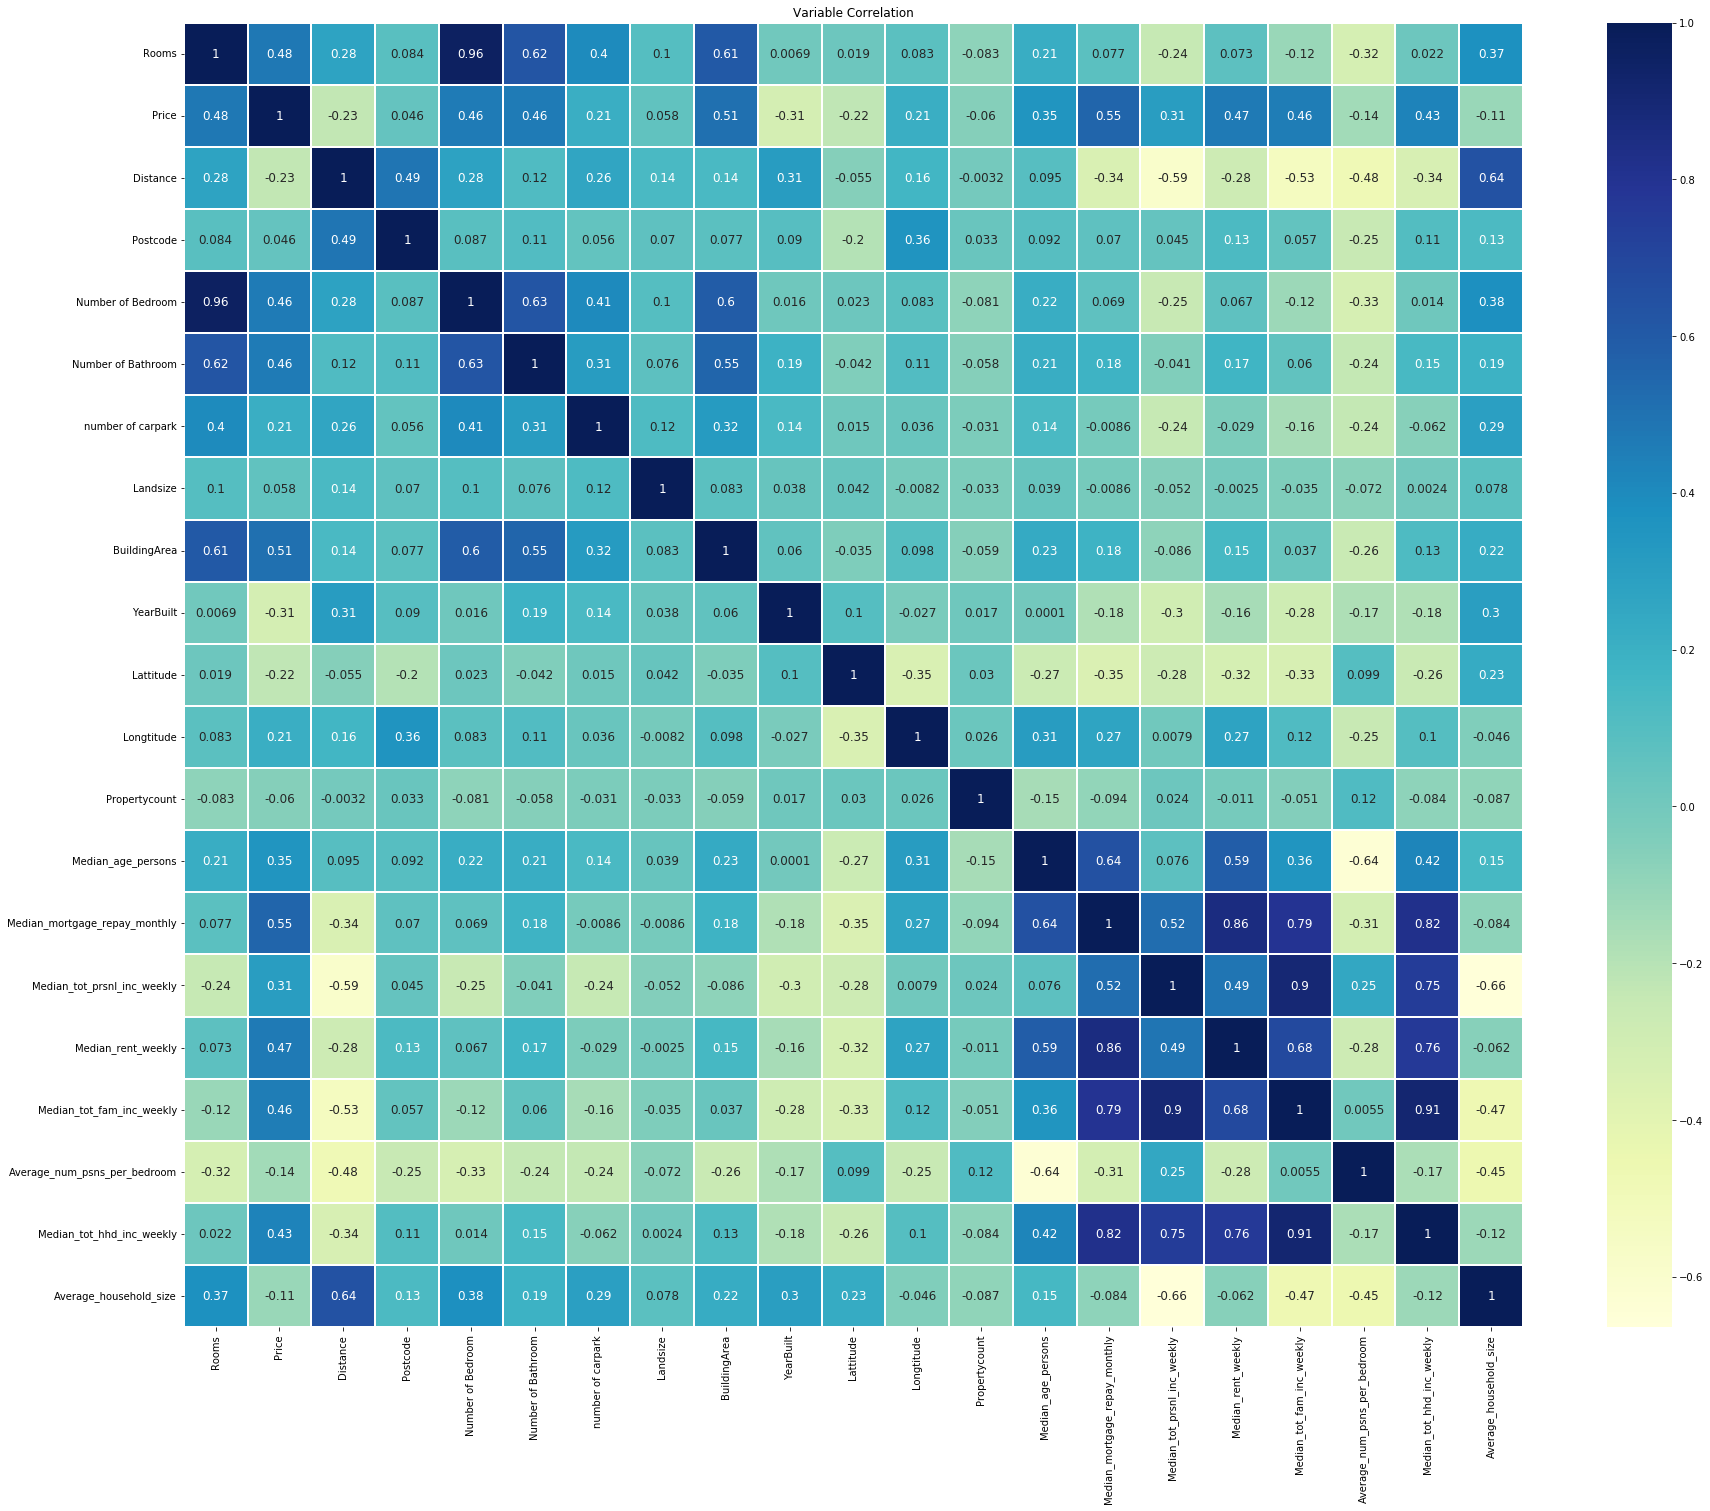

In [94]:
#plot correlation heatmap for all the variation

plt.figure(figsize = (30,24))
sns.heatmap(Main_data.corr(), cmap = 'YlGnBu', linewidth = 1, annot = True, annot_kws = {'size':12})
plt.title('Variable Correlation')